In [8]:
smallsentiment_df = catalog.load("small_corpus_with_sentiment")
smallsentiment_df.head(5)

2021-01-08 18:21:02,675 - kedro.io.data_catalog - INFO - Loading data from `small_corpus_with_sentiment` (CSVDataSet)...


/home/siavash/anaconda3/envs/sent/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rating,reviews,sentiment_score
0,1,Recently UBISOFT had to settle a huge class-ac...,-0.185185
1,1,"code didn't work, got me a refund.",-1.000000
2,1,"these do not work at all, all i get is static ...",0.000000
3,1,well let me start by saying that when i first ...,-0.166667
4,1,"Dont waste your money, you will just end up us...",0.000000


In [9]:
def rating_mapper(value):
    if value == 5:
        return 1
    if value == 1:
        return -1
    return 0

def sentiment_score_mapper(value):
    if value >0.2:
        return 1
    if value < -0.2:
        return -1
    return 0

smallsentiment_df["rating_class"]  = smallsentiment_df["rating"].map(rating_mapper)
smallsentiment_df["sentiment_score_class"]  = smallsentiment_df["sentiment_score"].map(sentiment_score_mapper)


smallsentiment_df.head(9)

/home/siavash/anaconda3/envs/sent/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rating,reviews,sentiment_score,rating_class,sentiment_score_class
0,1,Recently UBISOFT had to settle a huge class-ac...,-0.185185,-1,0
1,1,"code didn't work, got me a refund.",-1.000000,-1,-1
2,1,"these do not work at all, all i get is static ...",0.000000,-1,0
3,1,well let me start by saying that when i first ...,-0.166667,-1,0
4,1,"Dont waste your money, you will just end up us...",0.000000,-1,0
5,1,i ordered this and said it was tested and work...,0.000000,-1,0
6,1,"UPDATE, 2010: This review is pretty old, and ...",-0.473684,-1,-1
7,1,I WISH I COULD GET RID OF IT!!,0.000000,-1,0
8,1,What in the hell is this i can say that some o...,-1.000000,-1,-1


In [10]:
from sklearn.metrics import classification_report

print(classification_report(smallsentiment_df["rating_class"].tolist(),smallsentiment_df["sentiment_score_class"].tolist(),target_names=["negative","neutral","positive"]))

              precision    recall  f1-score   support

    negative       0.63      0.41      0.50      1500
     neutral       0.41      0.44      0.42      1500
    positive       0.59      0.74      0.66      1500

    accuracy                           0.53      4500
   macro avg       0.54      0.53      0.53      4500
weighted avg       0.54      0.53      0.53      4500



/home/siavash/anaconda3/envs/sent/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/siavash/anaconda3/envs/sent/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

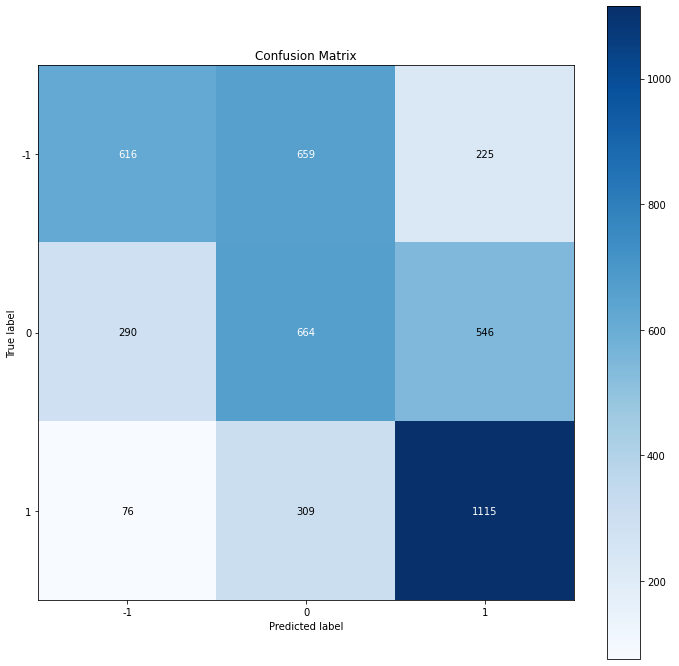

In [11]:
import scikitplot as skplt

y_true = smallsentiment_df["rating_class"].tolist()
y_pred = smallsentiment_df["sentiment_score_class"].tolist()
skplt.metrics.plot_confusion_matrix(
    y_true, 
    y_pred,
    figsize=(12,12) )


In [12]:
from itertools import product
import altair as alt
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

labels = np.unique(y_true)
cm = confusion_matrix(y_true, y_pred, labels=labels)
print(cm)
cm = [y for i in cm for y in i]
roll = list(product(np.unique(y_true), repeat = 2))
columns = ["actual", "predicted", "confusion_matrix"]
df = pd.DataFrame(columns=columns)
for i in range(len(roll)):
    df = df.append({'actual':roll[i][0], 'predicted':roll[i][1], 'confusion_matrix':cm[i]}, ignore_index=True)
#plot figure
def make_example(selector):
    return alt.Chart(df).mark_rect().encode(
        x="predicted:N",
        y="actual:N",
        color=alt.condition(selector, 'confusion_matrix', alt.value('lightgray'))
    ).properties(
        width=600,
        height=480
    ).add_selection(
        selector
    )
interval_x = alt.selection_interval(encodings=['x'], empty='none')
make_example(interval_x)


[[ 616  659  225]
 [ 290  664  546]
 [  76  309 1115]]


/home/siavash/anaconda3/envs/sent/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


alt.Chart(...)